# <p style="background-color:#fcba03; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;"> Introduction to DBSCAN</p>



<div class="alert alert-warning alert-info">
    
## <span style=" color:#bf2e98">DBSCAN: Density-Based Spatial Clustering of Applications with Noise

### How does DBSCAN work?
* DBSCAN focuses on using **density** of points as its main factor for assigning cluster labels.
* This creates the ability to find cluster segmentations that other algorithms have difficulty with.
* DBSCAN iterates through points and uses **two key hyperparameters (epsilon and minimum number of points)** to assign cluster labels.
* Unlike K-Means, it focuses on density as the main factor for cluster assignment of points.

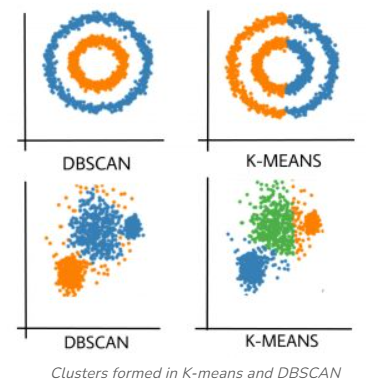

#### Key Hyperparameters:
* **Epsilon:** Distace extended from a point.
* **Minimum Number of Points:** Minimum number of points in an epsilon distance.

**DBSCAN Point Types:** Core, Border and Outlier.
* **Core:** Point with minimum points in epsilon range.
* **Border:** In epsioln range of core point, but does not contain minimum number of points.
* **Outlier:** Cannot be "reached" by points in a cluster assignment. So, it defines outliers.

### Difference Between DBSCAN and K-Means Clustering

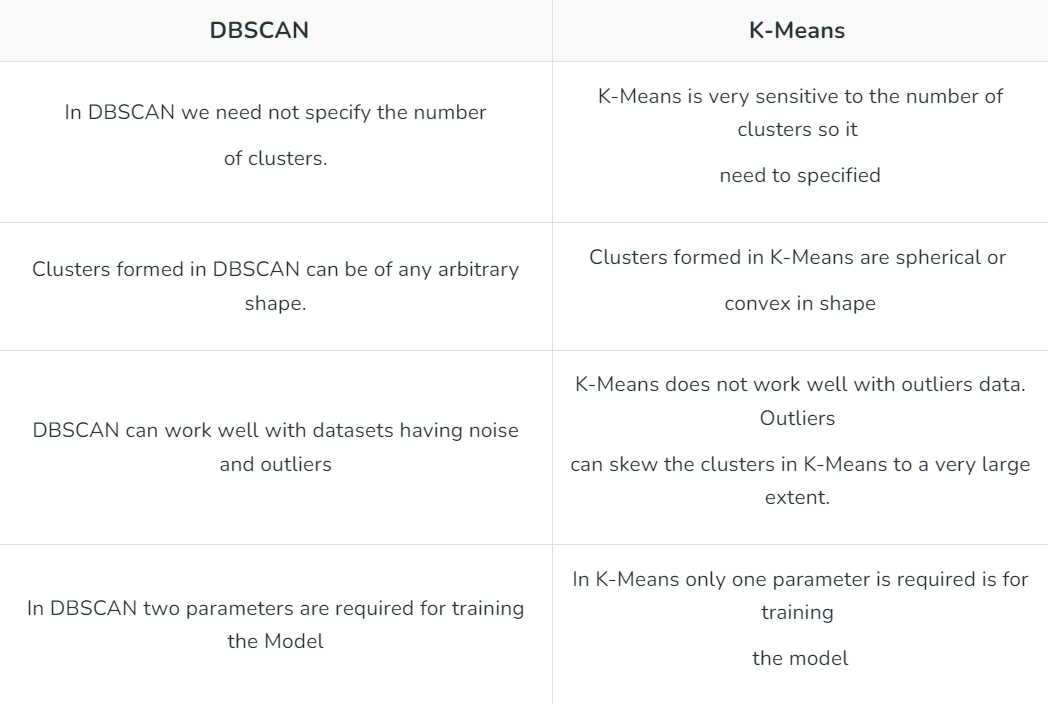
</span>

## DBSCAN and Clustering Examples
Let's explore visually the differences between DBSCAN and other clustering techniques, such as K-Means Clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Blobs dataset

In [2]:
blobs = pd.read_csv('cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


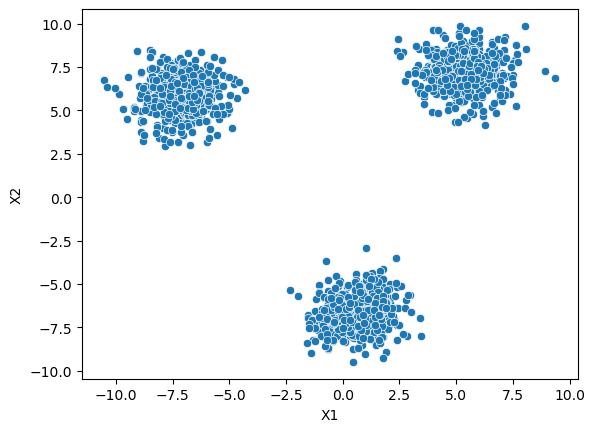

In [6]:
sns.scatterplot(data=blobs,x='X1',y='X2');

#### Moons dataset

In [8]:
moons = pd.read_csv("cluster_moons.csv")
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


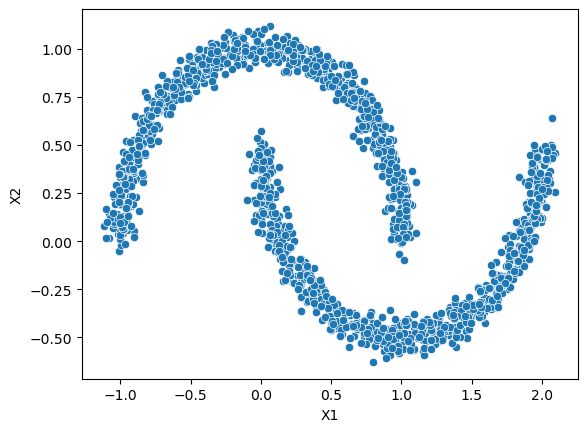

In [9]:
sns.scatterplot(data=moons,x='X1',y='X2');

#### Circles dataset

In [10]:
circles = pd.read_csv("cluster_circles.csv")
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


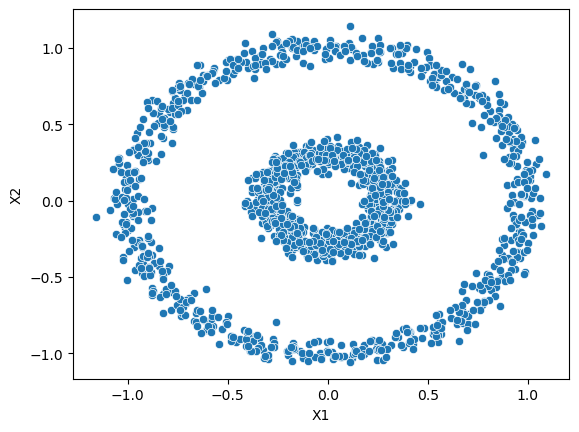

In [11]:
sns.scatterplot(data=circles,x='X1',y='X2');

## Label Discovery
Let's write a fuction to create clustering models and compare them.

In [30]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

### 1. K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

In [31]:
# expected categories for bloobs data
model = KMeans(n_clusters=3)

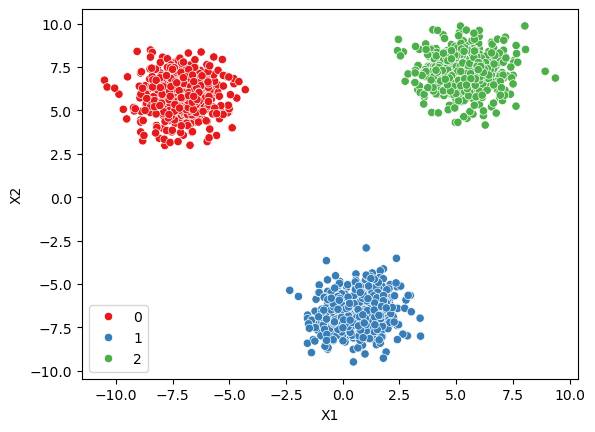

In [32]:
display_categories(model,blobs)

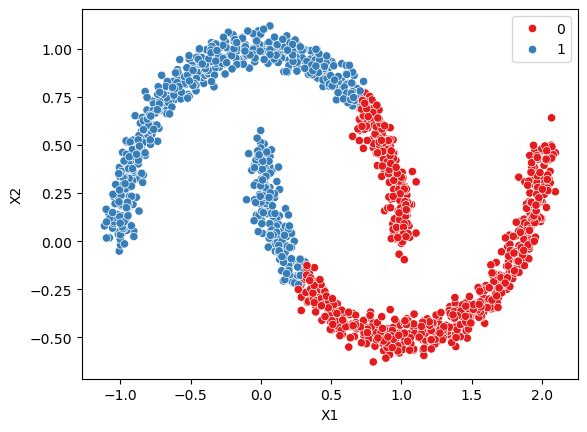

In [33]:
# For moons data: expected categories are 2
model = KMeans(n_clusters=2)
display_categories(model, moons)

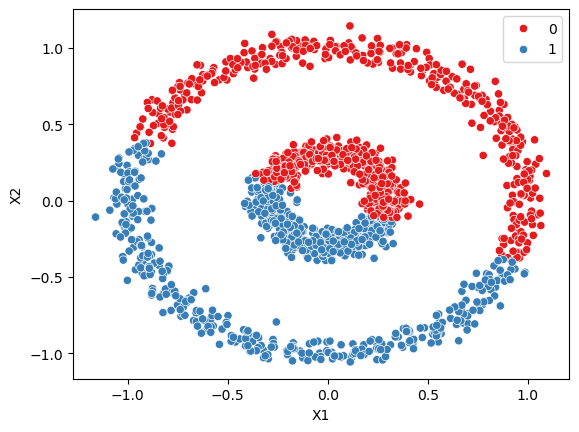

In [34]:
# For circles data: expected categories are 2
model = KMeans(n_clusters=2)
display_categories(model, circles)

<div class="alert alert-block alert-success">
    
<span style=" color:#eb346e">

**Result:** K-Means clustering model is not successful in moons and circles datasets beacuse of its focus in distance.</span>

### 2. DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [46]:
# Check the Hyperparamneters of DBSCAN
#help(DBSCAN)

# two key hyperparameters
"""
eps : float, default=0.5
      The maximum distance between two samples for one to be consideredas in the neighborhood of the other. 
      This is not a maximum bound on the distances of points within a cluster. 
      This is the most important DBSCAN parameter to choose appropriately for your data set
      and distance function.
  
min_samples : int, default=5
      The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
      This includes the point itself. If `min_samples` is set to a higher value, DBSCAN will find denser clusters,
      whereas if it is set to a lower value, the found clusters will be more sparse.
 """

'\neps : float, default=0.5\n      The maximum distance between two samples for one to be consideredas in the neighborhood of the other. \n      This is not a maximum bound on the distances of points within a cluster. \n      This is the most important DBSCAN parameter to choose appropriately for your data set\n      and distance function.\n  \nmin_samples : int, default=5\n      The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. \n      This includes the point itself. If `min_samples` is set to a higher value, DBSCAN will find denser clusters,\n      whereas if it is set to a lower value, the found clusters will be more sparse.\n '

In [39]:
# DBSCAN model with default values
model = DBSCAN()

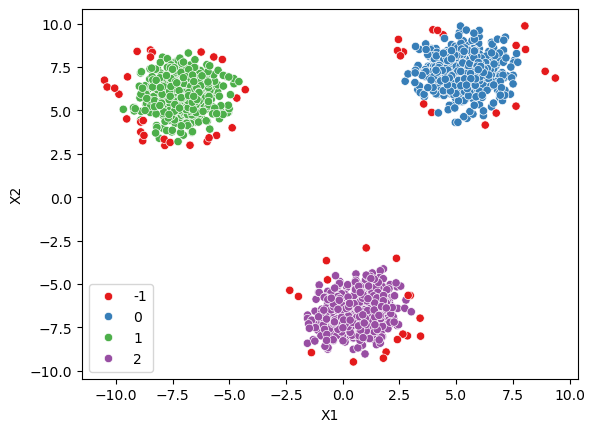

In [40]:
# Result for blobs data
display_categories(model, blobs)

<div class="alert alert-block alert-success">
    
<span style=" color:#eb346e">

**Result:** It distinguishes 3 categories. "-1" category (red points on the scatterplot) represents outliers. This feature is unique to DBSCAN model. Unlike the K-Means model, we did not determine any "n_clusters" here.</span>

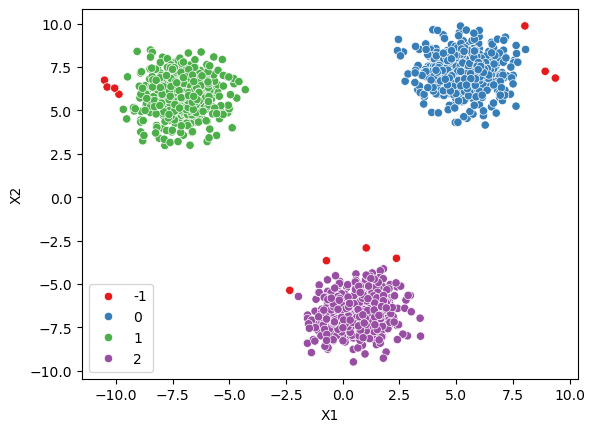

In [43]:
# We can adjust parameters for better clustering result

model = DBSCAN(eps=0.8)
display_categories(model,blobs)

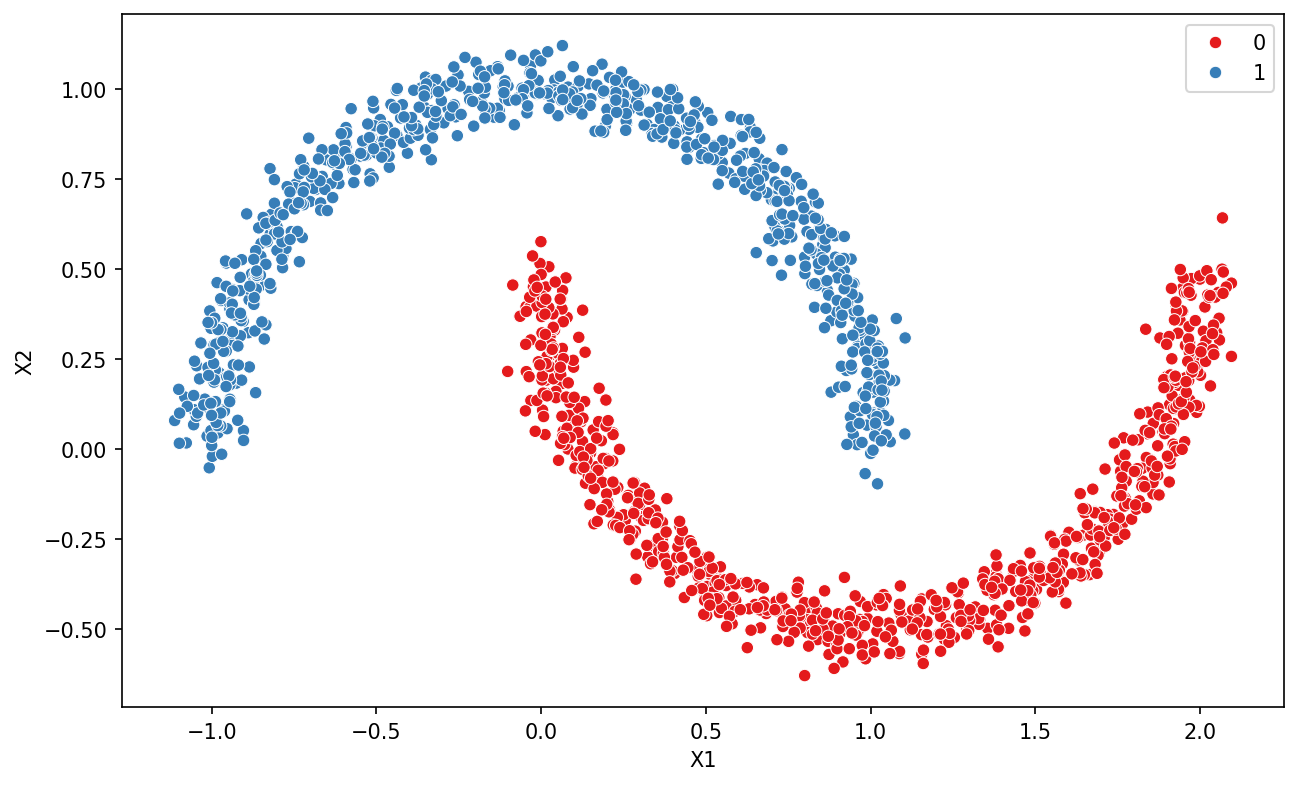

In [44]:
# For moons dataset

model = DBSCAN(eps=0.15)
plt.figure(figsize=(10,6),dpi=150)
display_categories(model,moons)

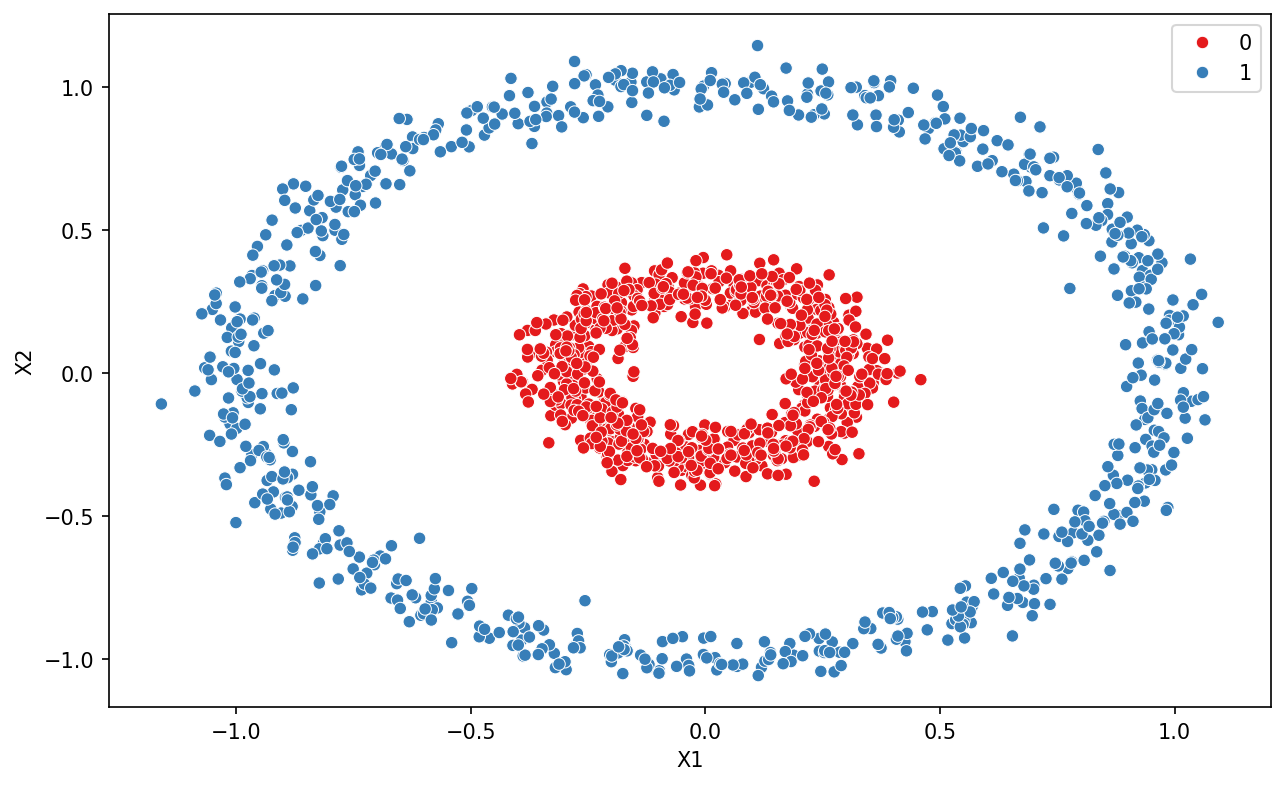

In [45]:
# For circles dataset

model = DBSCAN(eps=0.15)
plt.figure(figsize=(10,6),dpi=150)
display_categories(model,circles)